In [1]:
import os
import sys

sys.path.append('/home/jovyan/kipi1/chaewon/scAIence/neuralfingerprint')

In [2]:
import neuralfingerprint

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

import pandas as pd

import copy

In [2]:
bitterdb = pd.read_csv('bitterness.csv')
bitterdb.drop(['Unnamed: 0'], axis=1, inplace=True)
bitterdb.head()

,Name,PubChem CID,CAS number,canonical SMILES,Taste,Class taste,Bitterness
0,(-)-3-Methoxy-4-hydroxyphenol 1-O-?-D-(6?-O-ga...,385552,*,COc1cc(ccc1O)OC1OC(COC(=O)c2cc(c(c(c2)O)O)O)C(...,Bitter,Bitterness,1
1,(-)-alpha-thujone,261491,546-80-5,CC(C)C12CC2C(C)C(=O)C1,Bitter,Bitterness,1
2,(-)-Epicatechin,72276,490-46-0,OC1Cc2c(cc(cc2OC1c1ccc(c(c1)O)O)O)O,Bitter,Bitterness,1
3,(-)-Epicatechin gallate,107905,1257-08-5,Oc1cc(c2c(c1)OC(C(C2)OC(=O)c1cc(c(c(c1)O)O)O)c...,Bitter,Bitterness,1
4,(-)-Epigallocatechin (EGC),72277,970-74-1,OC1Cc2c(cc(cc2OC1c1cc(c(c(c1)O)O)O)O)O,Bitter,Bitterness,1


In [3]:
bitterdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              2511 non-null   object
 1   PubChem CID       2511 non-null   object
 2   CAS number        2511 non-null   object
 3   canonical SMILES  2511 non-null   object
 4   Taste             2511 non-null   object
 5   Class taste       2511 non-null   object
 6   Bitterness        2511 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 137.4+ KB


In [11]:
bitterdb[bitterdb['PubChem CID']=='243']['canonical SMILES'].values[0]

'OC(=O)c1ccccc1'

In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors
mol = Chem.MolFromSmiles(bitterdb[bitterdb['PubChem CID']=='243']['canonical SMILES'].values[0])  # e.g. Paracetamol

# Ro5 descriptors
MW = Descriptors.MolWt(mol)
RING = Descriptors.RingCount(mol)
QPlogHERG = Descriptors.QED(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
# conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
# pass_ro5 = conditions.count(True) >= 3
# print(pass_ro5)
print('Molecular weight: ', MW)
print('Ring count: ', RING)
print('QPlogHERG: ', QPlogHERG)
print('HBA: ', HBA)
print('HBD: ', HBD)
print('LogP: ', LogP)

AttributeError: module 'rdkit.Chem.Descriptors' has no attribute 'QED'

### 1. Import dataframe from ChemTasteDB

In [24]:
chemtaste = pd.read_excel('ChemTastesDB_database.xlsx')
chemtaste.head()

,ID,Name,PubChem CID,CAS number,canonical SMILES,Taste,Class taste,Reference_(cod)/[pp]
0,0001,(-)-Haematoxylin,320930,517-28-2,Oc1cc2c(cc1O)C1c3ccc(c(c3OCC1(O)C2)O)O,Sweet,Sweetness,Arnoldi1995_((-)-1); Bassoli2001_(39)
1,0002,(+)-4β-hydroxyhernandulcin,126862,145385-64-4,CC(C)=CCCC(C)(O)C1CC(O)C(=CC1=O)C,Sweet,Sweetness,Kinghorn1998_(2); Kinghorn2002_(7); Kinghorn20...
2,0003,(+)-Dihydroquercetin 3-acetate,442540,78834-97-6,CC(=O)OC1C(Oc2cc(cc(c2C1=O)O)O)c1ccc(c(c1)O)O,Sweet,Sweetness,Bouysset2020_(175); Kinghorn2002_(26); Shallen...
3,0004,(+)-Haematoxylin,442514,517-28-2,Oc1cc2c(cc1O)C1c3ccc(c(c3OCC1(O)C2)O)O,Sweet,Sweetness,Arnoldi1995_((+)-1); Arnoldi1996_(12); Bassoli...
4,0005,(±)-chiro-inositol,892,643-12-9,OC1C(O)C(O)C(O)C(O)C1O,Sweet,Sweetness,Shallenberger1993_[149]


In [25]:
# Use deepcopy for preserving the original dataframe
ct = copy.deepcopy(chemtaste)

# Check for null values
ct.isnull().sum()

ID                      3
Name                    1
PubChem CID             3
CAS number              3
canonical SMILES        3
Taste                   3
Class taste             3
Reference_(cod)/[pp]    3
dtype: int64

In [26]:
# Delete the last 3 lines because they are descriptions
ct.tail()

,ID,Name,PubChem CID,CAS number,canonical SMILES,Taste,Class taste,Reference_(cod)/[pp]
2942,2943,WS23,3016599,51115-71-0,CCNC(=O)C(C)(C(C)C)C(C)C,Cooling,Miscellaneous,Ley2012_[28]
2943,2944,WS3,62907,39711-79-0,CCNC(=O)C1CC(C)CCC1C(C)C,Cooling,Miscellaneous,Ley2012_[28]
2944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2945,NaN,"^ Chemical compound information (name, PubChem...",NaN,NaN,NaN,NaN,NaN,NaN
2946,NaN,* IUPAC name generated in Marvin Sketch 21.17.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ct = ct[:2944]
ct.tail()

,ID,Name,PubChem CID,CAS number,canonical SMILES,Taste,Class taste,Reference_(cod)/[pp]
2939,2940,Spilanthol,5353001,25394-57-4,CC=CC=CCCC=CC(=O)NCC(C)C,"Heating, pungent, and tingling",Miscellaneous,Ley2012_[26]
2940,2941,Tannic acid,16129778,1401-55-4,Oc1cc(cc(c1O)O)C(=O)Oc1cc(cc(c1O)O)C(=O)OCC1OC...,Astringent,Miscellaneous,Ley2012_[29]
2941,2942,trans-Pellitorine,5318516,18836-52-7,CCCCCC=CC=CC(=O)NCC(C)C,"Heating, pungent, and tingling",Miscellaneous,Ley2012_[26]
2942,2943,WS23,3016599,51115-71-0,CCNC(=O)C(C)(C(C)C)C(C)C,Cooling,Miscellaneous,Ley2012_[28]
2943,2944,WS3,62907,39711-79-0,CCNC(=O)C1CC(C)CCC1C(C)C,Cooling,Miscellaneous,Ley2012_[28]


In [28]:
# Drop the columns that are not needed
ct.drop(['Reference_(cod)/[pp]'], inplace=True, axis=1)

Check this [link][ChemTasteDB paper] for understanding the meaning of values in *['Taste']* column such as *'Sweet(16); Bitter', 'Non-sweet(2); Bitter(2)'* or other tastes.

[ChemTasteDB paper]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8991844/#:~:text=in%20this%20step%3B-,d.,bitter%2C%20non%2Dbitter/burning%2C%20non%2Dsweet/sweet%2C%20sweet/bitter%2C%20sweet/tasteless\).,-2.4.%20Analysis%20of

In [29]:
ct[ct['Taste'].str.contains('bitter', case=False)]['Taste'].unique()

array(['Sweet(5); Bitter', 'Sweet(16); Bitter', 'Sweet(11); Bitter',
       'Sweet; Sweet/Bitter', 'Sweet(4); Bitter', 'Sweet/Bitter; Sweet',
       'Sweet(11); Sweet/Bitter', 'Sweet(6); Bitter', 'Sweet(18); Bitter',
       'Sweet(13); Bitter', 'Sweet(12); Bitter', 'Bitter',
       'Strongly bitter', 'Bitter; Non-sweet', 'Extremely bitter',
       'Moderately bitter', 'Slightly bitter', 'Somewhat bitter',
       'Moderately bitter; Bitter(2)', 'Very bitter',
       'Non-sweet(2); Bitter(2)', 'Non-sweet; Bitter',
       'Moderately bitter; Slightly sweet; Bitter', 'Faintly bitter',
       'Intensely bitter', 'Strongly bitter; Bitter',
       'Bitter(2); Astringent', 'Entirely Bitter; Bitter',
       'Bitter(2); Non-sweet',
       'Bitter(2); Bitter/Slightly bitter; Non-sweet',
       'Bitter(3); Slightly bitter; Non-sweet', 'Bitter(2); Sweet/Bitter',
       'Tasteless; Bitter(3); Slightly bitter; Non-sweet',
       'Bitter(3); Non-sweet', 'Bitter(4); Non-sweet',
       'Bitter; Salty/Bi

In [31]:
# Organizing a data frame to perform a binary classification of whether a molecule is bitter or not

# For bitter molecules, use only data with a value of 'Bitterness' in the ['Class taste'] column
bitterness = ct[ct['Class taste'] == 'Bitterness']

# For non-bitter molecules,
# use data with values of 'Sweetness', 'Umaminess', 'Sourness', 'Saltiness', and 'Tastelessness'
# in the ['Class taste'] column
others = ct[ct['Class taste'].str.contains('Sweetness|Umaminess|Sourness|Saltiness|Tastelessness')]

# Create a new column, ['bitterness'], and label it with 1 for bitter molecules and 0 for non-bitter molecules.
bitterness.insert(7, 'Bitterness', 1)
others.insert(7, 'Bitterness', 0)

bitterness = pd.concat((bitterness, others), axis=0)


bitterness.drop(['ID'], inplace=True, axis=1)
bitterness.reset_index(inplace=True, drop=True)

bitterness

# bitterness.to_csv('bitterness.csv', index=True)

In [32]:
len(bitterness[bitterness['Bitterness'] == 0])

1328

In [12]:
bitterness['canonical SMILES'].max()

NameError: name 'bitterness' is not defined

### Rdkit 실습

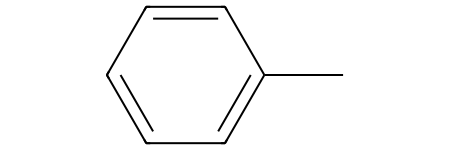

In [131]:
m = Chem.MolFromSmiles('Cc1ccccc1') 
m

In [132]:
type(m)

rdkit.Chem.rdchem.Mol

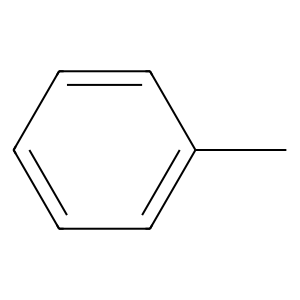

In [133]:
img = Draw.MolToImage(m)
img

In [134]:
from rdkit.Chem.Draw import rdMolDraw2D

In [135]:
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('c1cc(F)ccc1Cl')
hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)


In [136]:
hit_ats

[0, 1, 2, 3, 4, 5, 6, 7]

In [4]:
import chemspipy

In [5]:
from chemspipy import ChemSpider

In [6]:
cs = ChemSpider('ajMYHSA210pqN25bhrb4UJYA7wdepRTq')
cs

ChemSpider()

In [8]:
c = cs.get_compound(2157)

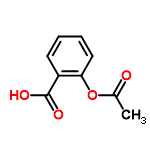

In [ ]:
c